<a href="https://colab.research.google.com/github/Percy-O/Sentiment-Analysis/blob/main/Sentiment_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_data= pd.read_csv('drive/MyDrive/sentiment/datas_.csv')
df_tarrif = pd.read_csv('drive/MyDrive/sentiment/tarrif_plan.csv')
df_customer = pd.read_csv('drive/MyDrive/sentiment/customers_.csv')
df_quality = pd.read_csv('drive/MyDrive/sentiment/qualities_.csv')

In [ ]:
# concat all dataframes into one dataframe
df = pd.concat([df_data,df_tarrif,df_customer,df_quality])
df

,Unnamed: 0,Username,Tweet,Like Count,Retweet Count,Subjectivity,Polarity,Analysis
0,0.0,GloWorld,Hello . Ou data plans have been designed t...,0,0,0.357143,0.000000,Neutral
1,1.0,GloWorld,Hello . Kindly dial *127*02*phone number # ...,0,0,0.708333,0.322222,Strong
2,2.0,GloWorld,"Hello , I am sorry to hear this and for the...",0,0,0.950000,0.050000,Strong
3,3.0,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,Weak
4,4.0,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,Weak
...,...,...,...,...,...,...,...,...
258,NaN,inemesitaffia,it's called quality of service qos scheduling...,0,1,0.000000,0.000000,Neutral
259,NaN,tedypen,dy just wastin money on advert instead of beta...,0,0,0.000000,0.000000,Neutral
260,NaN,mrmosore,I'll remind u when u start cursing gloRT : Qua...,0,0,0.000000,0.000000,Neutral
261,NaN,Von_Smallhousen,Quality of service RT : MTN n Glo...wats d dif...,0,0,0.000000,0.000000,Neutral


In [ ]:
df.drop(['Unnamed: 0'],axis=1)

,Username,Tweet,Like Count,Retweet Count,Subjectivity,Polarity,Analysis
0,GloWorld,Hello . Ou data plans have been designed t...,0,0,0.357143,0.000000,Neutral
1,GloWorld,Hello . Kindly dial *127*02*phone number # ...,0,0,0.708333,0.322222,Strong
2,GloWorld,"Hello , I am sorry to hear this and for the...",0,0,0.950000,0.050000,Strong
3,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,Weak
4,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,Weak
...,...,...,...,...,...,...,...
258,inemesitaffia,it's called quality of service qos scheduling...,0,1,0.000000,0.000000,Neutral
259,tedypen,dy just wastin money on advert instead of beta...,0,0,0.000000,0.000000,Neutral
260,mrmosore,I'll remind u when u start cursing gloRT : Qua...,0,0,0.000000,0.000000,Neutral
261,Von_Smallhousen,Quality of service RT : MTN n Glo...wats d dif...,0,0,0.000000,0.000000,Neutral


In [ ]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    return x

df["Preprocessed Text"] = df["Tweet"].apply(lambda x: text_preprocess(x))
df.head()

,Unnamed: 0,Username,Tweet,Like Count,Retweet Count,Subjectivity,Polarity,Analysis,Preprocessed Text
0,0.0,GloWorld,Hello . Ou data plans have been designed t...,0,0,0.357143,0.000000,Neutral,hello . ou data plans have been designed t...
1,1.0,GloWorld,Hello . Kindly dial *127*02*phone number # ...,0,0,0.708333,0.322222,Strong,hello . kindly dial *127*02*phone number # ...
2,2.0,GloWorld,"Hello , I am sorry to hear this and for the...",0,0,0.950000,0.050000,Strong,"hello , i am sorry to hear this and for the..."
3,3.0,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,Weak,i bought mtn 6gb for 1500 weekly you guy ow...
4,4.0,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,Weak,i bought mtn 6gb for 1500 weekly you guy ow...


## Categorical Encoding

# New Section

In [ ]:
map_data = {
    'Weak':0,
    'Very Weak':1,
    'Neutral':2,
    'Strong':3,
    'Very Strong':4,
}

df['Analysis']= df['Analysis'].map(map_data)

# df_data['Analysis']= df_data['Analysis'].astype("category").cat.codes

In [ ]:
df=df.drop('Unnamed: 0', axis=1)
df

,Username,Tweet,Like Count,Retweet Count,Subjectivity,Polarity,Analysis,Preprocessed Text
0,GloWorld,Hello . Ou data plans have been designed t...,0,0,0.357143,0.000000,2,hello . ou data plans have been designed t...
1,GloWorld,Hello . Kindly dial *127*02*phone number # ...,0,0,0.708333,0.322222,3,hello . kindly dial *127*02*phone number # ...
2,GloWorld,"Hello , I am sorry to hear this and for the...",0,0,0.950000,0.050000,3,"hello , i am sorry to hear this and for the..."
3,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,0,i bought mtn 6gb for 1500 weekly you guy ow...
4,umehvictor19,I bought mtn 6gb for 1500 weekly you Guy's ...,0,0,0.833333,-0.166667,0,i bought mtn 6gb for 1500 weekly you guy ow...
...,...,...,...,...,...,...,...,...
258,inemesitaffia,it's called quality of service qos scheduling...,0,1,0.000000,0.000000,2,it is called quality of service qos schedulin...
259,tedypen,dy just wastin money on advert instead of beta...,0,0,0.000000,0.000000,2,dy just wastin money on advert instead of beta...
260,mrmosore,I'll remind u when u start cursing gloRT : Qua...,0,0,0.000000,0.000000,2,i will remind u when u start cursing glort : q...
261,Von_Smallhousen,Quality of service RT : MTN n Glo...wats d dif...,0,0,0.000000,0.000000,2,quality of service rt : mtn n glo...wats d dif...


<ipython-input-52-a11bc2933e3b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


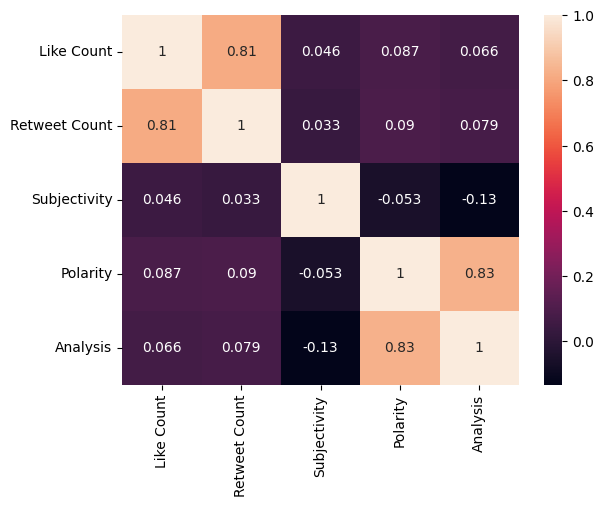

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = df['Preprocessed Text']
y = df['Analysis']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=2)


## Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
X_train = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test = count_vector.transform(X_test)

# Model Evaluation Function

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score ,precision_score

def evaluation(y_test,y_pred):

  print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
  print('Precision score: ', format(precision_score(y_test, y_pred,average='macro')) )
  print('Recall score: ', format(recall_score(y_test, y_pred,average='macro')))
  print('F1 score: ', format(f1_score(y_test, y_pred,average='macro')))


## Setting up the Model

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = NB.predict(X_test)
evaluation(y_test,y_pred)

Accuracy score:  0.6630901287553648
Precision score:  0.4227870251813914
Recall score:  0.39508656597245323
F1 score:  0.3943104716690525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
evaluation(y_test,y_pred)

Accuracy score:  0.7360515021459227
Precision score:  0.6162327528900563
Recall score:  0.5759190897597978
F1 score:  0.5881950878059827


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

sm = SVC()
sm.fit(X_train,y_train)


SVC()

In [ ]:
y_pred = sm.predict(X_test)
evaluation(y_test,y_pred)

Accuracy score:  0.6931330472103004
Precision score:  0.41719153716532487
Recall score:  0.4333341539689933
F1 score:  0.42143023273843666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
evaluation(y_test,y_pred)

Accuracy score:  0.7317596566523605
Precision score:  0.6045203081232493
Recall score:  0.5436288508882827
F1 score:  0.5616895427903488


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predicting with a new data

In [ ]:
doc = pd.Series("I hate you")
test = count_vector.transform(doc)

In [ ]:
get = NB.predict(test)
if get[0] == 0:
  print('Weak')
elif get[0] == 1:
  print('Very Weak')
elif get[0] == 2:
  print('Neutral')
elif get[0] == 3:
  print('Strong')
elif get[0] == 4:
  print('Very Strong')
else:
  print("None")

Weak
